In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


In [2]:
df = pd.read_excel("sim.xlsx")

In [7]:
df

,jo,jt
0,566,388
1,388,327
2,327,323
3,323,313
4,313,623
5,623,982
6,982,1441
7,1441,2110
8,2110,2267
9,2267,2249


In [9]:
train = df.iloc[:11]


In [10]:
test = df.iloc[11:]

In [11]:
train

,jo,jt
0,566,388
1,388,327
2,327,323
3,323,313
4,313,623
5,623,982
6,982,1441
7,1441,2110
8,2110,2267
9,2267,2249


In [12]:
test

,jo,jt
11,2077,1901
12,1901,1739
13,1739,1632
14,1632,1576
15,1576,1548
16,1548,1722
17,1722,1682
18,1682,1695
19,1695,1718
20,1718,1632


In [13]:
scaler=MinMaxScaler()
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.fit_transform(test)
scaled_train

array([[0.12947799, 0.0383828 ],
       [0.0383828 , 0.00716479],
       [0.00716479, 0.00511771],
       [0.00511771, 0.        ],
       [0.        , 0.15864893],
       [0.15864893, 0.34237462],
       [0.34237462, 0.57727738],
       [0.57727738, 0.919652  ],
       [0.919652  , 1.        ],
       [1.        , 0.99078813],
       [0.99078813, 0.90276356]])

In [14]:
n_input = 1
n_features = 1
generator= TimeseriesGenerator(scaled_train[0],scaled_train[1],length=1,batch_size=1)
generator[0]

(array([[0.12947799]]), array([0.00716479]))

In [15]:
model = Sequential()
model.add(LSTM(100,activation='relu',input_shape=(1,1)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.fit(generator,epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 812ms/step - loss: 6.6133e-05
Epoch 2/100
1/1 [==============================] - 0s 9ms/step - loss: 2.9484e-05
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 8.2060e-06
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 2.7996e-07
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 1.9474e-06
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7784e-06
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 1.2833e-05
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 1.4812e-05
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 1.3574e-05
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 1.0231e-05
Epoch 11/100
1/1 [==============================] - 0s 12ms/step - loss: 6.2088e-06
Epoch 12/100
1/1 [==============================] - 0s 10ms/step - loss: 2.7327e-06
E

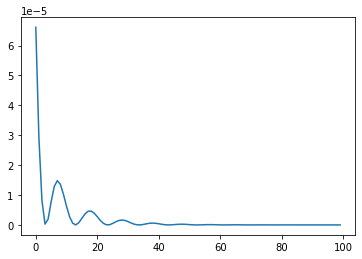

In [18]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [19]:
pred = model.predict([[0.56272401]])
pred

array([[0.00866735]], dtype=float32)

In [20]:
scaler.inverse_transform([[0.56272401,0.00866735]])

array([[1703.12902855,  859.10938485]])